In [3]:
import numpy as np
import pandas as pd
import time

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# statistics
from scipy import stats

import os

In [4]:
# configs
pd.set_option('display.max_columns', None) # we want to display all columns in this notebook

# random seed
my_random_seed = 321

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

root = os.getcwd()
data_root = ""
print(root)
if root.startswith("/kaggle"):
    print("True")
    # Running on kaggle notebook
    data_root  = "/kaggle/input/isic-2024-challenge/"
else:
    data_root = "isic-2024-challenge/"

/home/charles/mc-it/sml/SML-A3


In [5]:
# load data

df_train = pd.read_csv(data_root + 'train-metadata.csv', low_memory=False)
df_test = pd.read_csv(data_root + 'test-metadata.csv', low_memory=False)
df_sub = pd.read_csv(data_root + 'sample_submission.csv')

In [6]:
# basic stats - train
df_train.describe(include='all')

isic_id         target  patient_id     age_approx     sex  \
count         401059  401059.000000      401059  398261.000000  389542   
unique        401059            NaN        1042            NaN       2   
top     ISIC_0015670            NaN  IP_1117889            NaN    male   
freq               1            NaN        9184            NaN  265546   
mean             NaN       0.000980         NaN      58.012986     NaN   
std              NaN       0.031288         NaN      13.596165     NaN   
min              NaN       0.000000         NaN       5.000000     NaN   
25%              NaN       0.000000         NaN      50.000000     NaN   
50%              NaN       0.000000         NaN      60.000000     NaN   
75%              NaN       0.000000         NaN      70.000000     NaN   
max              NaN       1.000000         NaN      85.000000     NaN   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
count               395303           401059.000000              401059   
unique                   5                     NaN                   1   
top        posterior torso                     NaN  TBP tile: close-up   
freq                121902                     NaN              401059   
mean                   NaN                3.930827                 NaN   
std                    NaN                1.743068                 NaN   
min                    NaN                1.000000                 NaN   
25%                    NaN                2.840000                 NaN   
50%                    NaN                3.370000                 NaN   
75%                    NaN                4.380000                 NaN   
max                    NaN               28.400000                 NaN   

       tbp_tile_type       tbp_lv_A    tbp_lv_Aext       tbp_lv_B  \
count         401059  401059.000000  401059.000000  401059.000000   
unique             2            NaN            NaN            NaN   
top           3D: XP            NaN            NaN            NaN   
freq          285903            NaN            NaN            NaN   
mean             NaN      19.974007      14.919247      28.281706   
std              NaN       3.999489       3.529384       5.278676   
min              NaN      -2.487115      -9.080269      -0.730989   
25%              NaN      17.330821      12.469740      24.704372   
50%              NaN      19.801910      14.713930      28.171570   
75%              NaN      22.304628      17.137175      31.637429   
max              NaN      48.189610      37.021680      54.306900   

          tbp_lv_Bext       tbp_lv_C    tbp_lv_Cext       tbp_lv_H  \
count   401059.000000  401059.000000  401059.000000  401059.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        26.913015      34.786341      30.921279      54.653689   
std          4.482994       5.708469       4.829345       5.520849   
min          9.237066       3.054228      11.846520      -1.574164   
25%         23.848125      31.003148      27.658285      51.566273   
50%         26.701704      34.822580      30.804893      55.035632   
75%         29.679913      38.430298      33.963868      58.298184   
max         48.372700      58.765170      54.305290     105.875784   

          tbp_lv_Hext       tbp_lv_L    tbp_lv_Lext  tbp_lv_areaMM2  \
count   401059.000000  401059.000000  401059.000000   401059.000000   
unique            NaN            NaN            NaN             NaN   
top               NaN            NaN            NaN             NaN   
freq              NaN            NaN            NaN             NaN   
mean        60.996869      42.289976      51.199529        8.539975   
std          5.631909      10.864572      12.100527        9.679312   
min         28.436490       4.223007      17.702260        0.431601 

In [7]:
# show all columns
print(df_train.columns.tolist())

['isic_id', 'target', 'patient_id', 'age_approx', 'sex', 'anatom_site_general', 'clin_size_long_diam_mm', 'image_type', 'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext', 'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB', 'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple', 'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id', 'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5', 'mel_mitotic_index', 'mel_thick_mm', 'tbp_lv_dnn_lesion_confidence']


In [8]:
# define features and target

# categorical
features_cat =['sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
               'tbp_lv_location', 'tbp_lv_location_simple', 'attribution', 'copyright_license']

# numerical
features_num = ['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
                'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 
                'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
                'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
                'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity',
                'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 
                'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 
                'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 
                'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z']

# target
target = 'target'

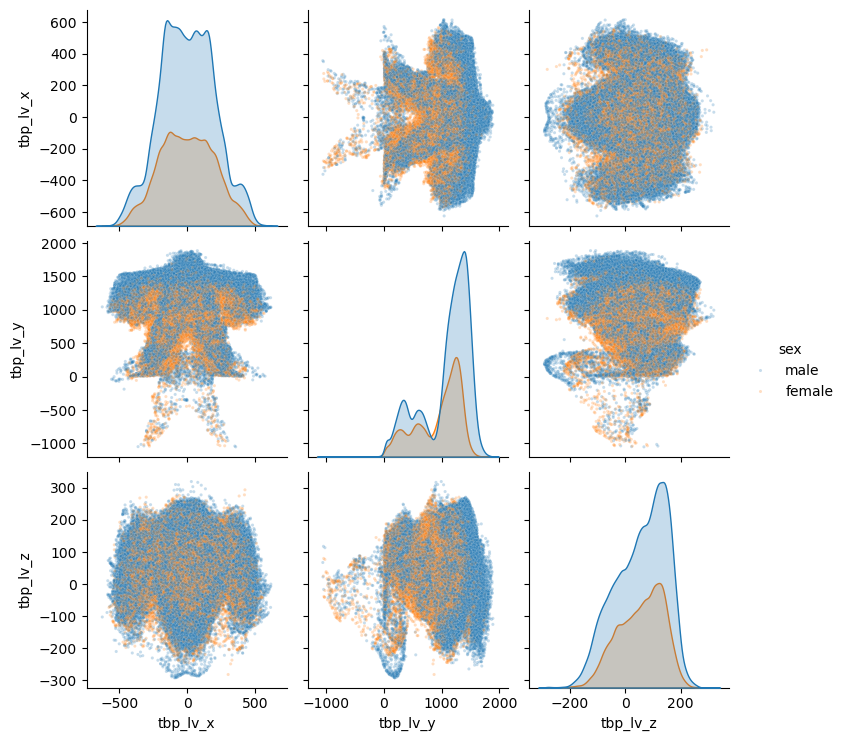

In [9]:
# plot x,y,z coordinates
sns.pairplot(data=df_train[['tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'sex']],
             hue='sex',
             plot_kws={'s' : 5,
                       'alpha' : 0.25})
plt.show()

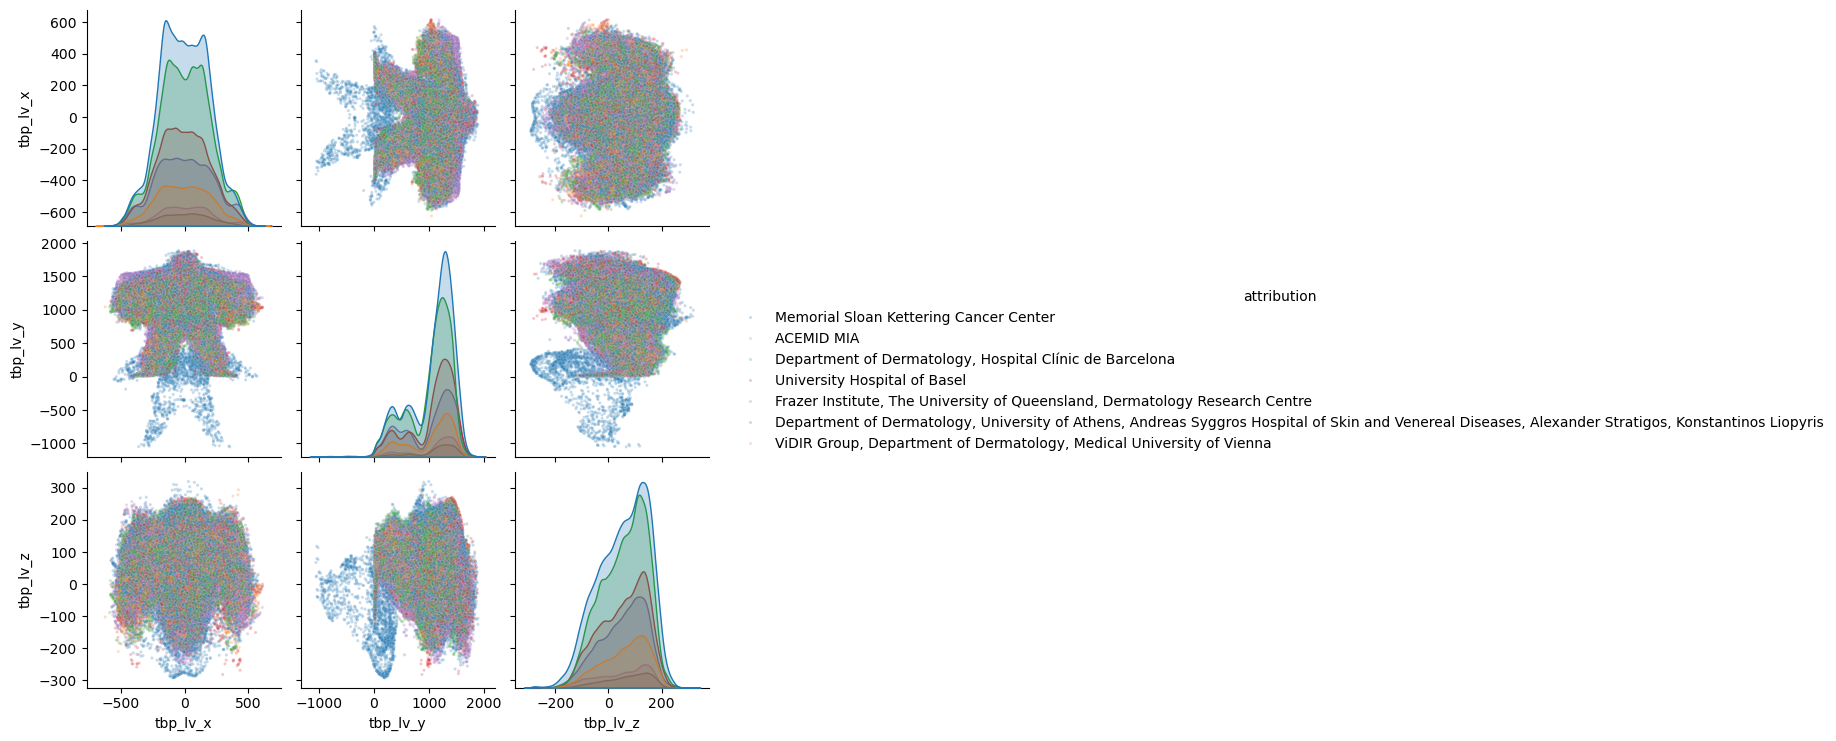

In [10]:
# plot x,y,z coordinates
sns.pairplot(data=df_train[['tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z', 'attribution']],
             hue='attribution',
             plot_kws={'s' : 5,
                       'alpha' : 0.25})
plt.show()

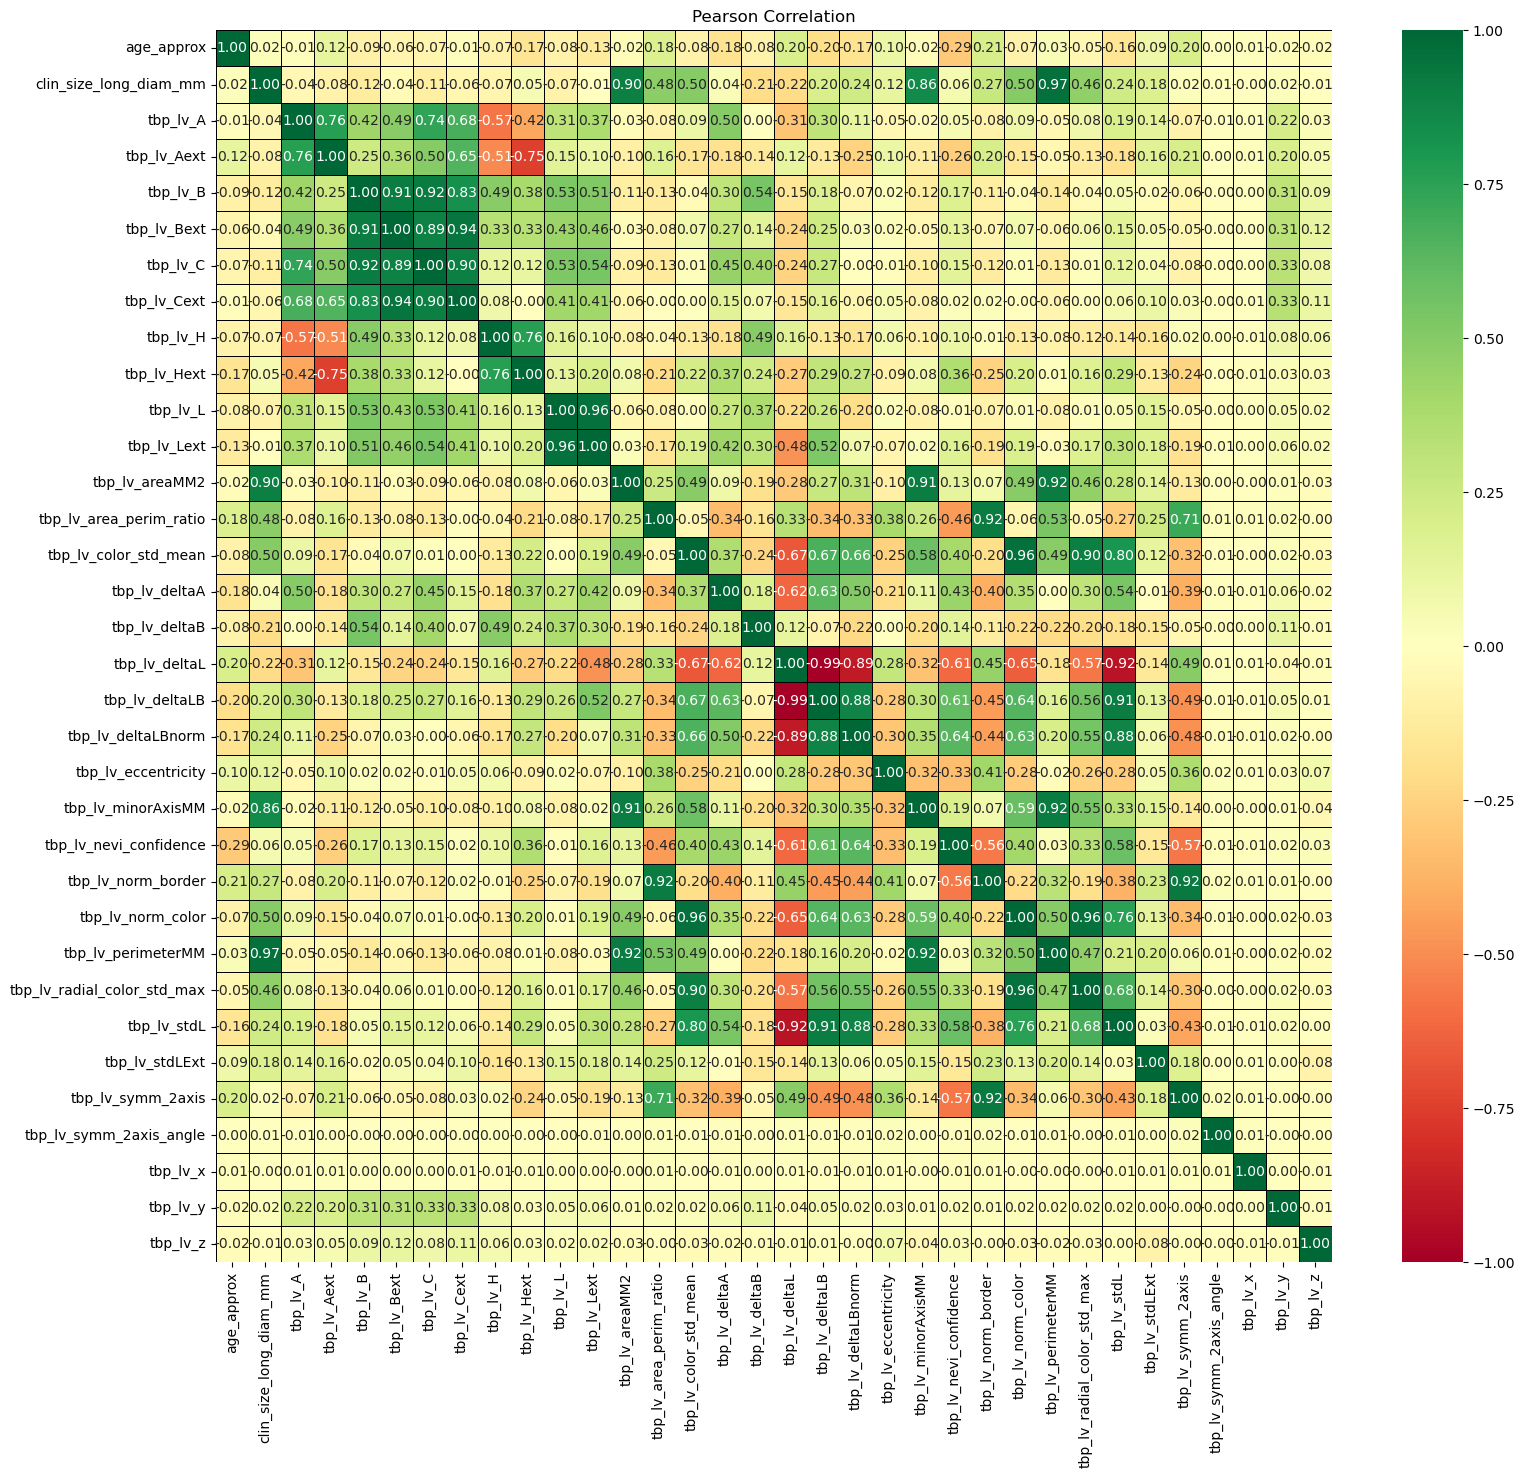

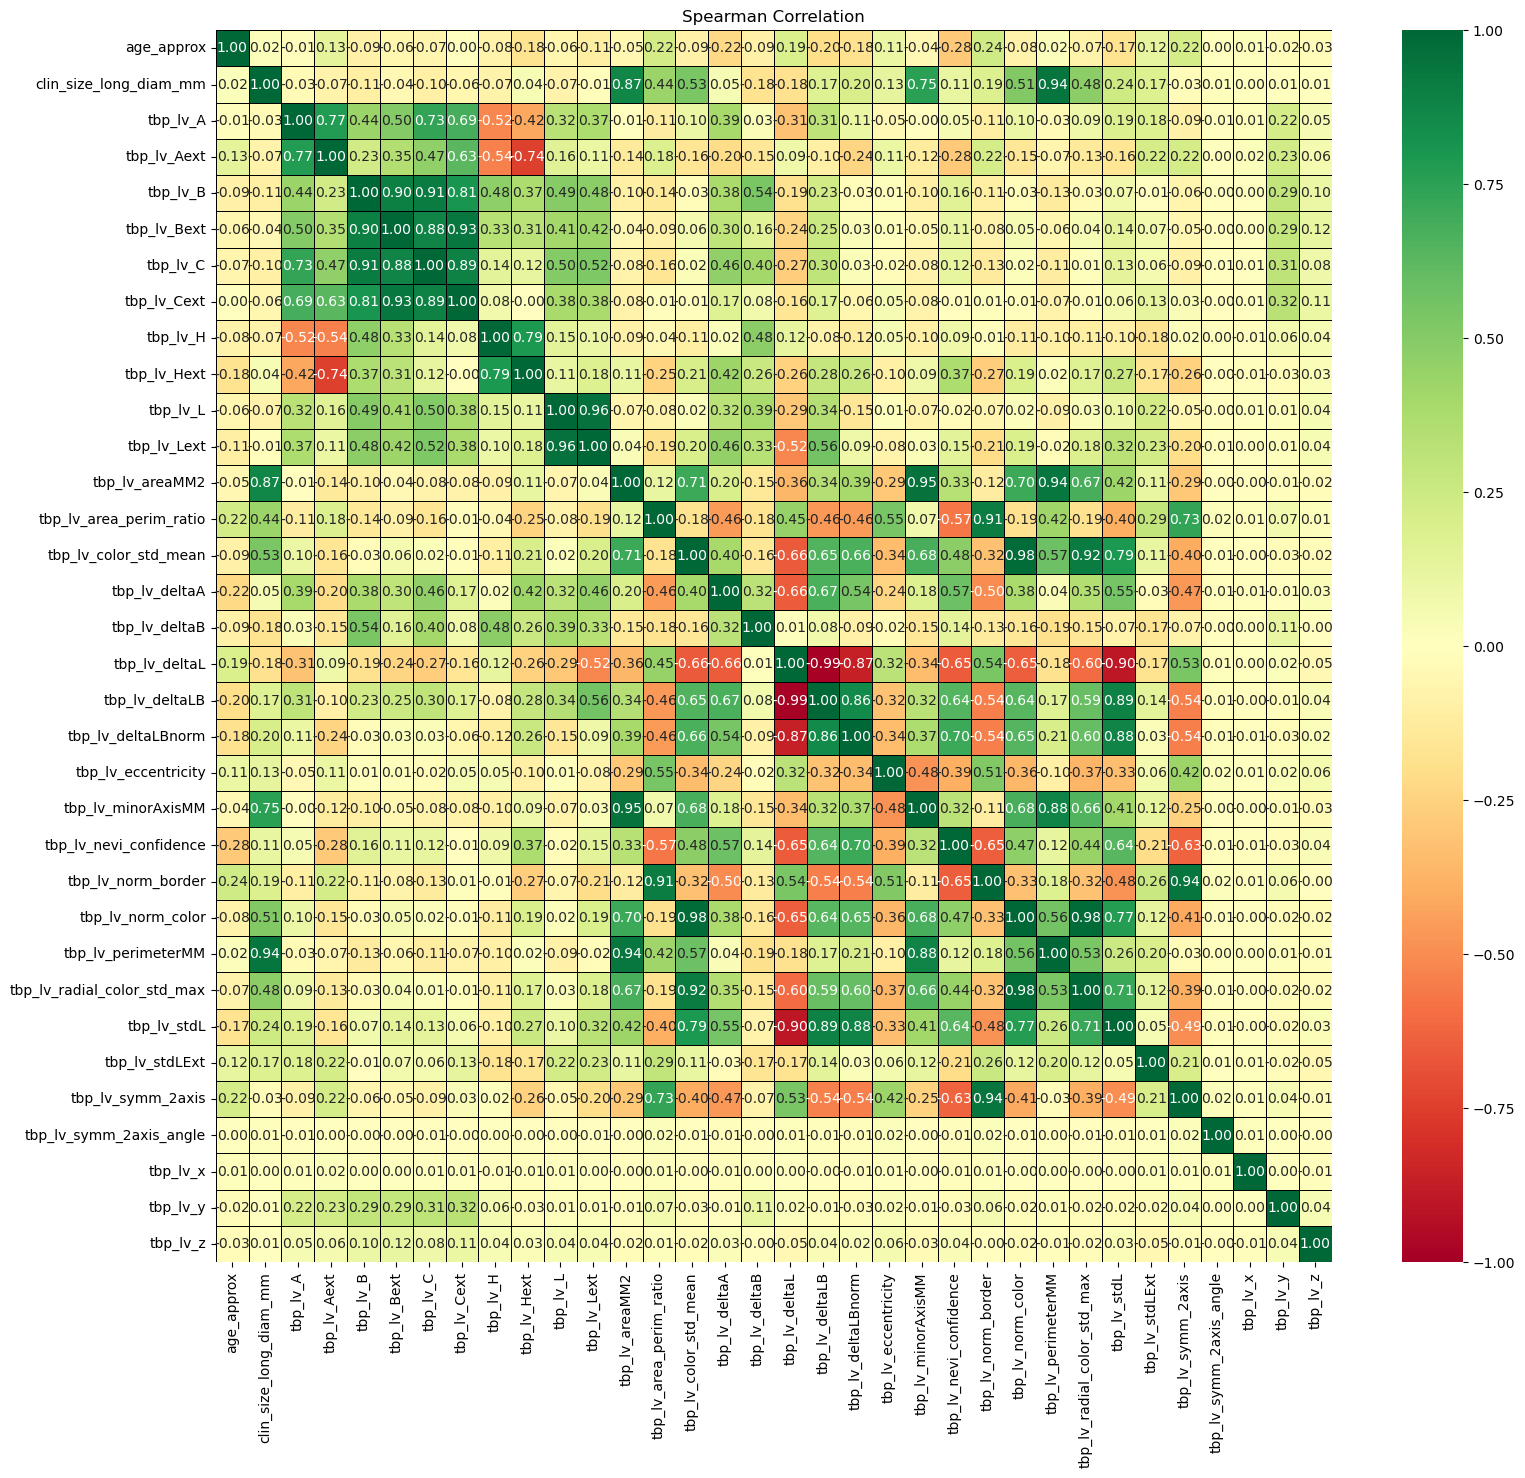

In [11]:
corr_pearson = df_train[features_num].corr(method='pearson')
plt.figure(figsize=(18,16))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn',
            fmt='.2f', linecolor='black', linewidths=0.5,
            vmin=-1, vmax=+1)
plt.title('Pearson Correlation')

corr_spearman = df_train[features_num].corr(method='spearman')
plt.figure(figsize=(18,16))
sns.heatmap(corr_spearman, annot=True, cmap='RdYlGn', 
            fmt='.2f', linecolor='black', linewidths=0.5,
            vmin=-1, vmax=+1)
plt.title('Spearman Correlation')
plt.show()

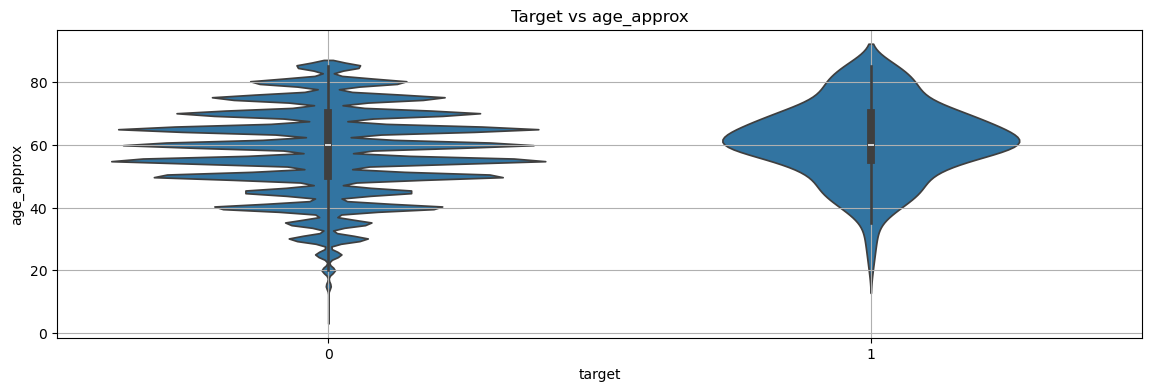

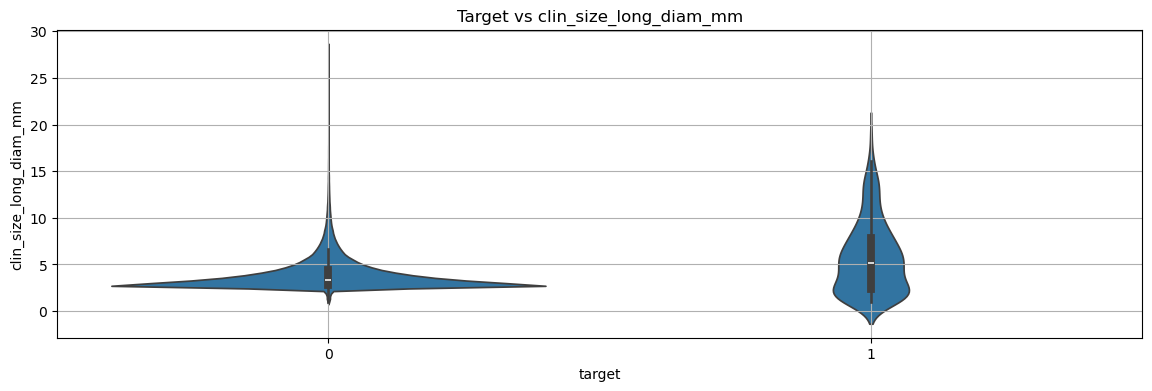

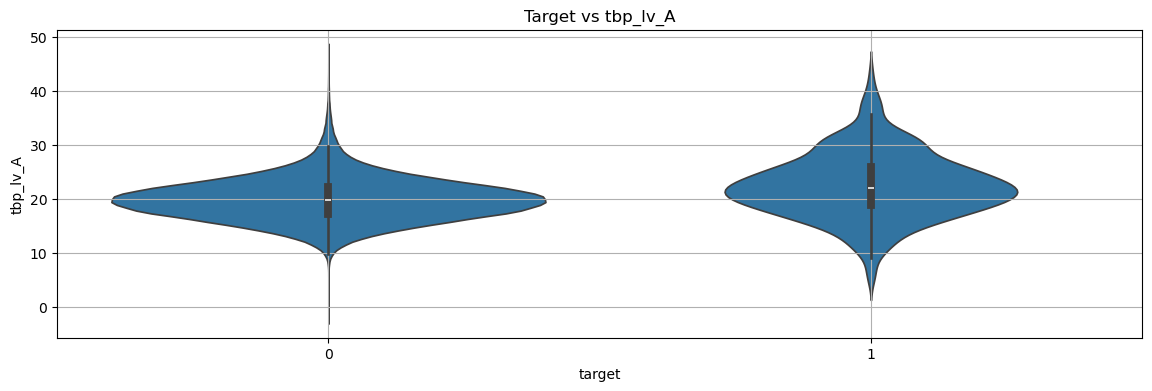

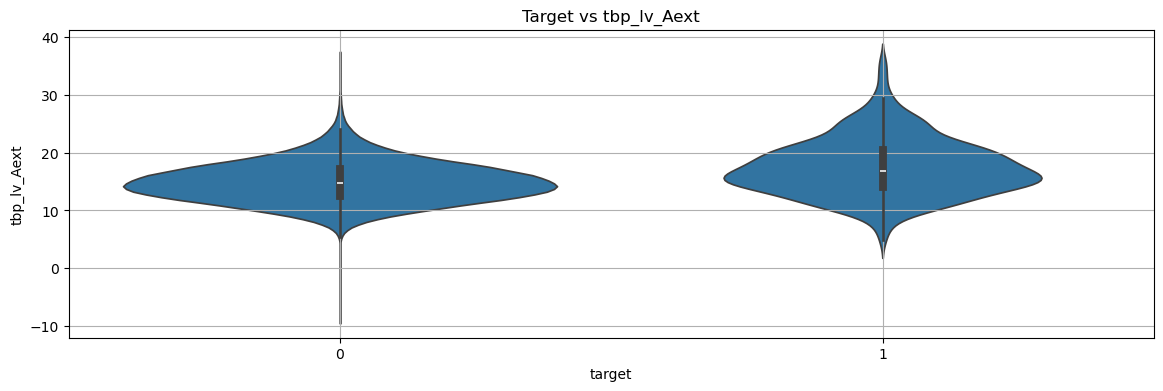

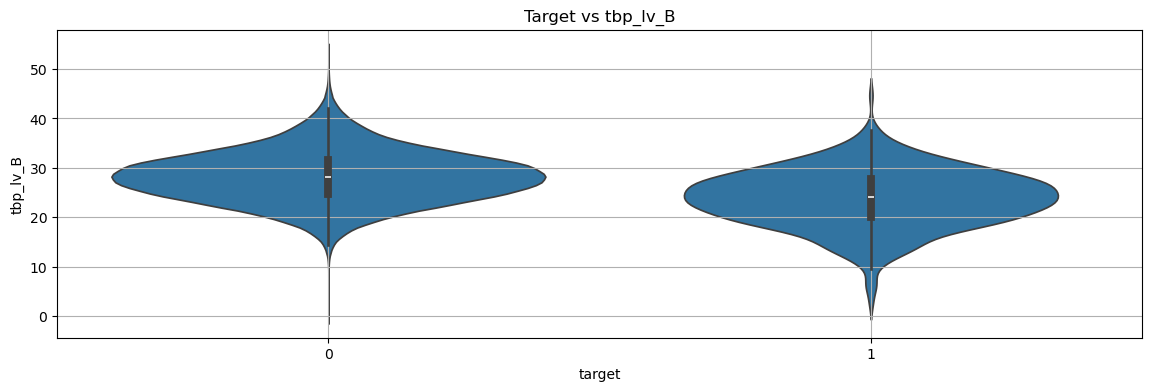

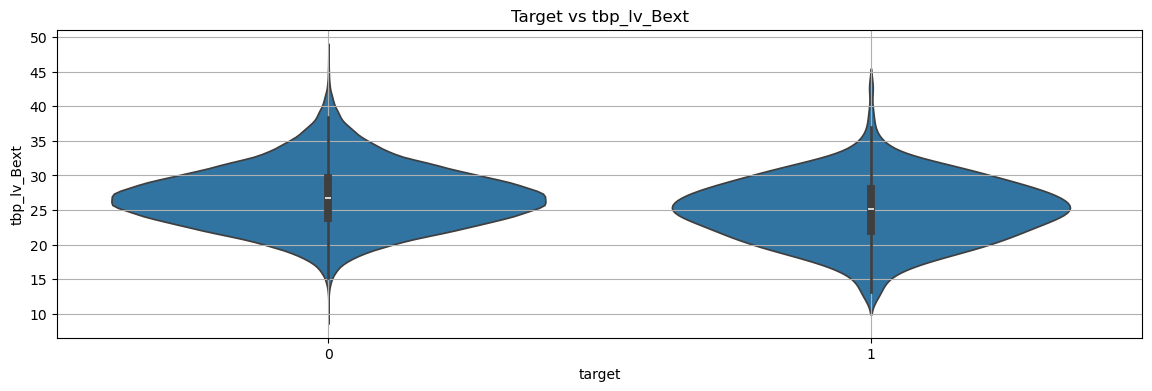

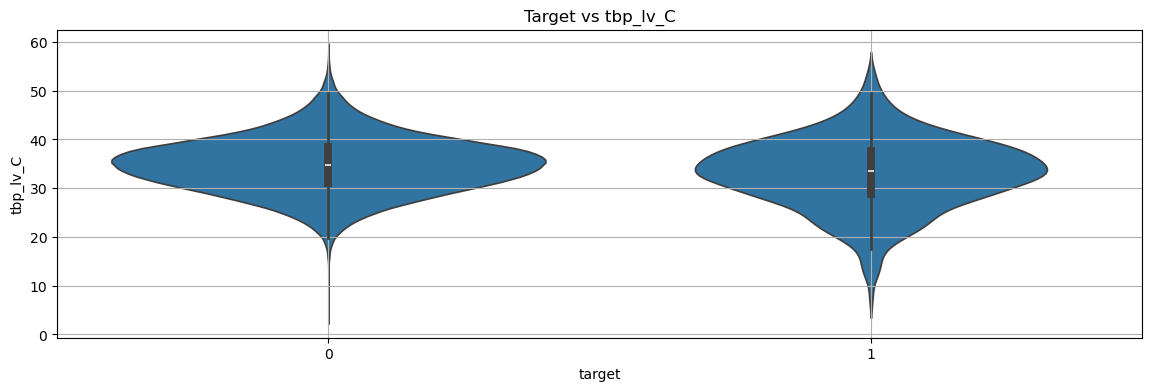

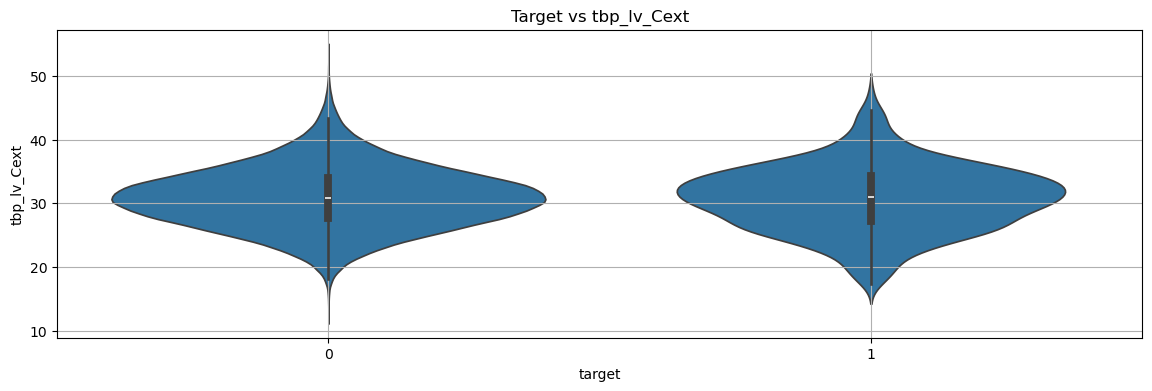

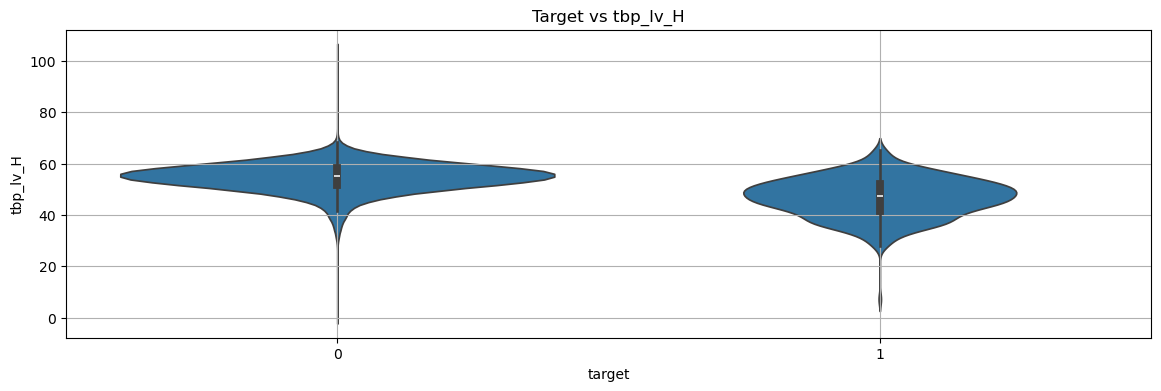

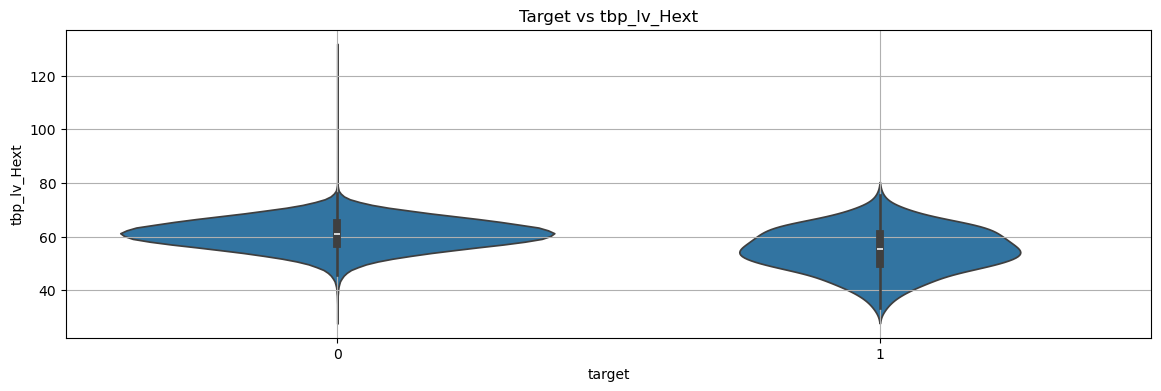

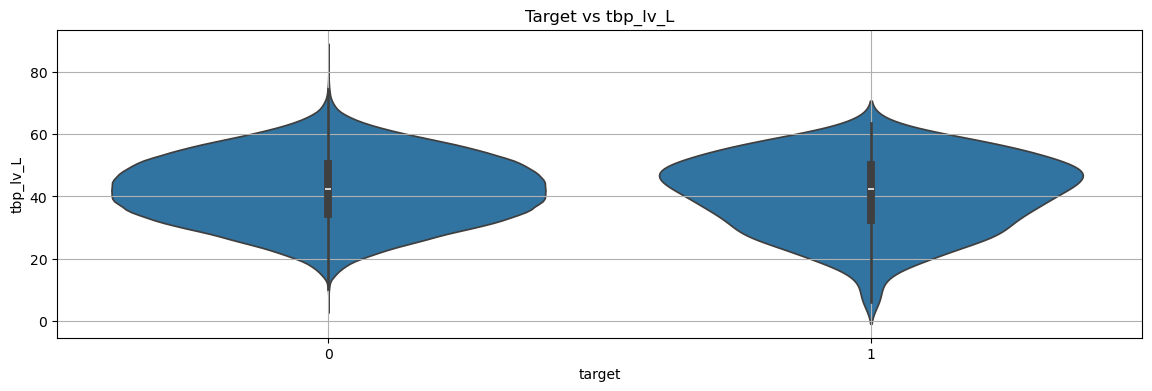

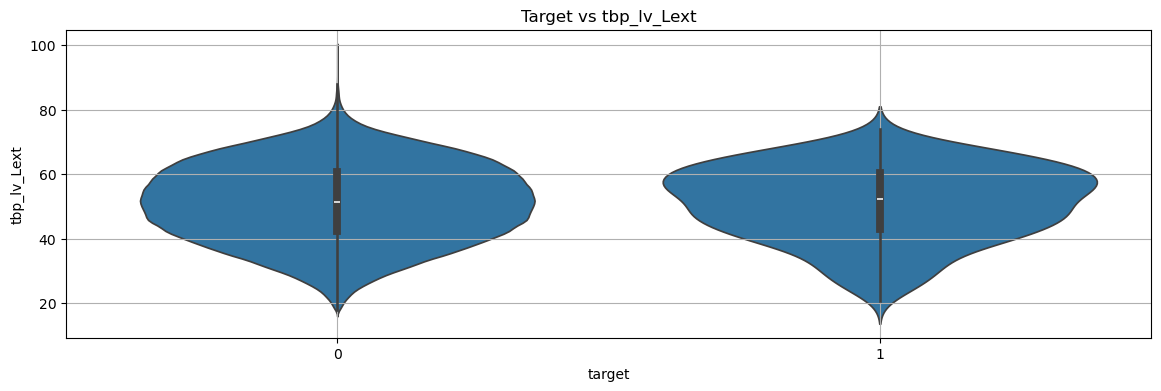

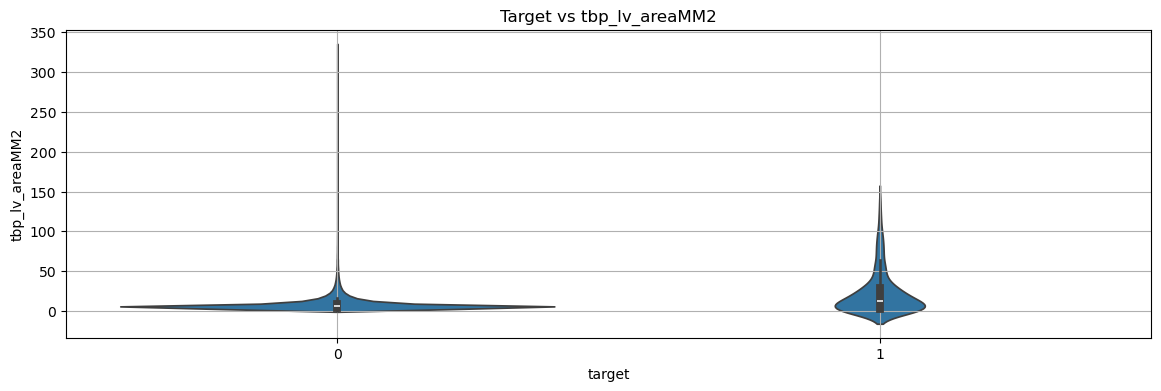

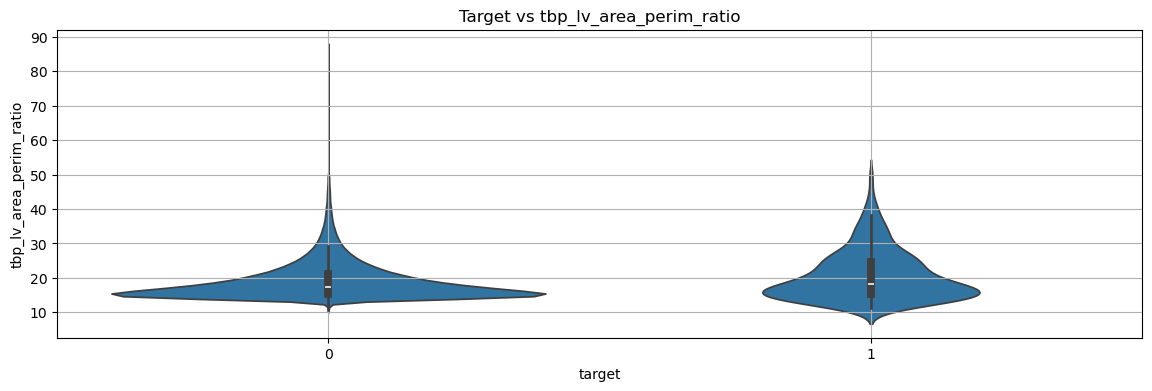

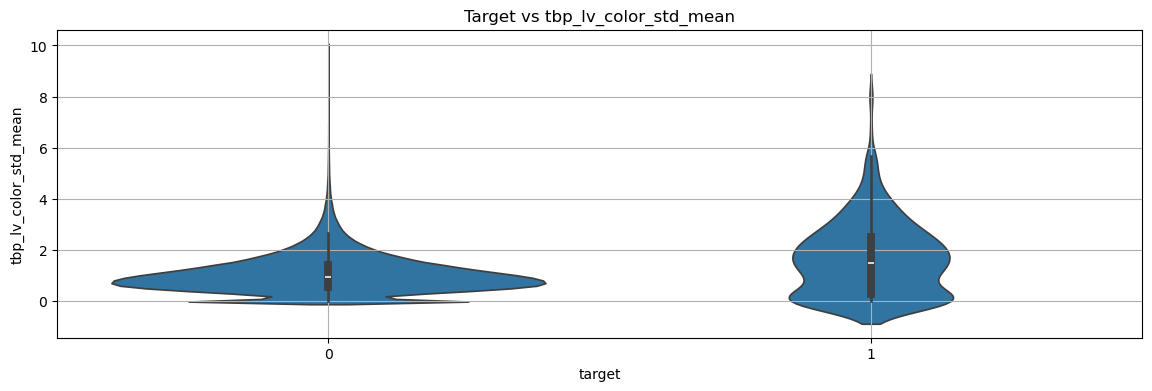

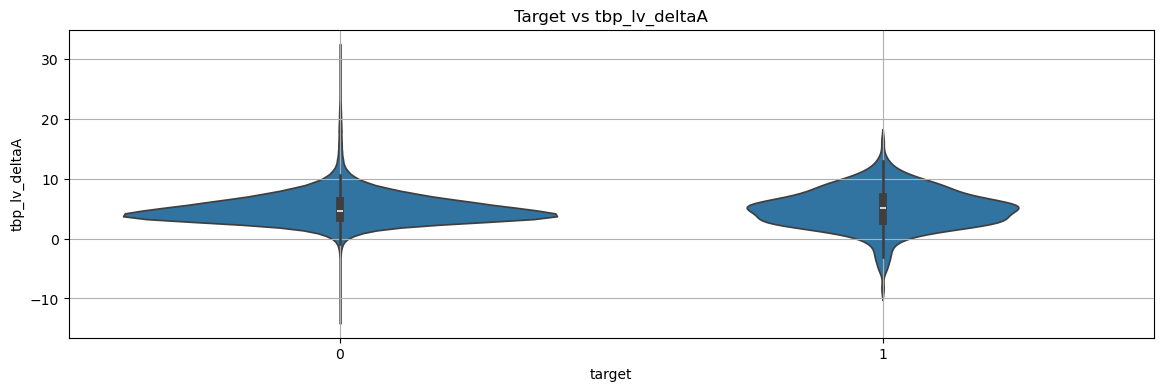

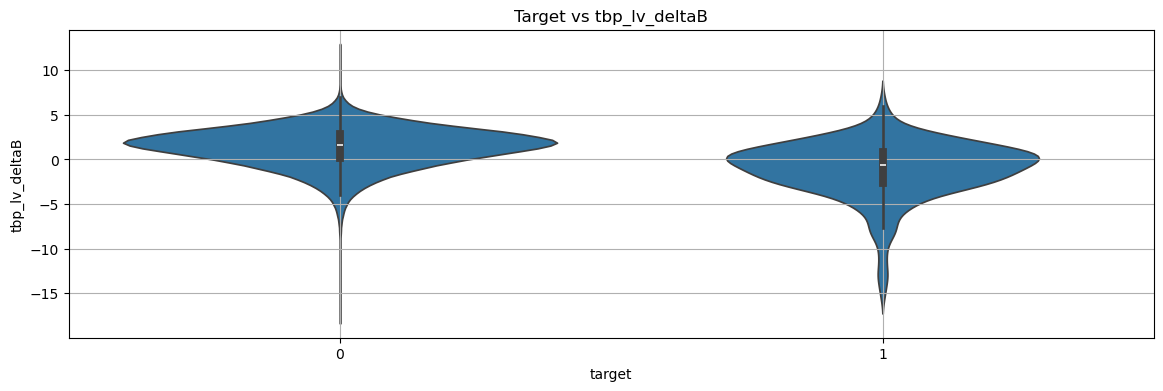

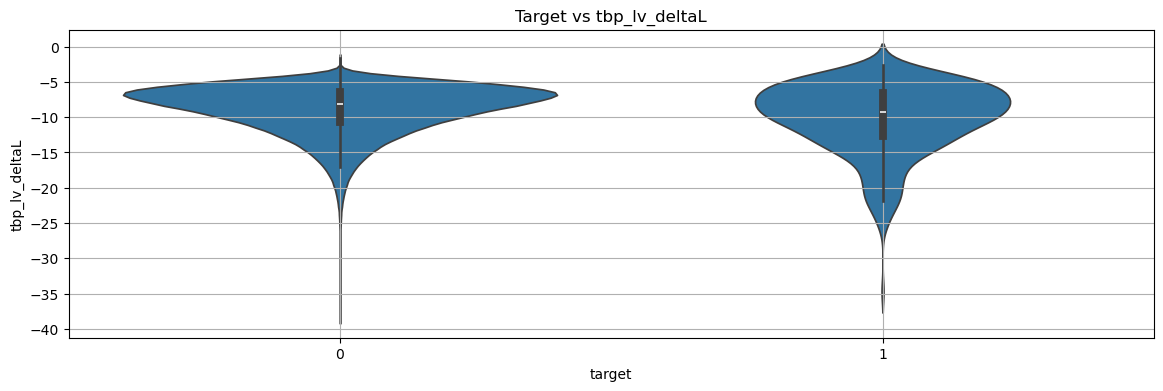

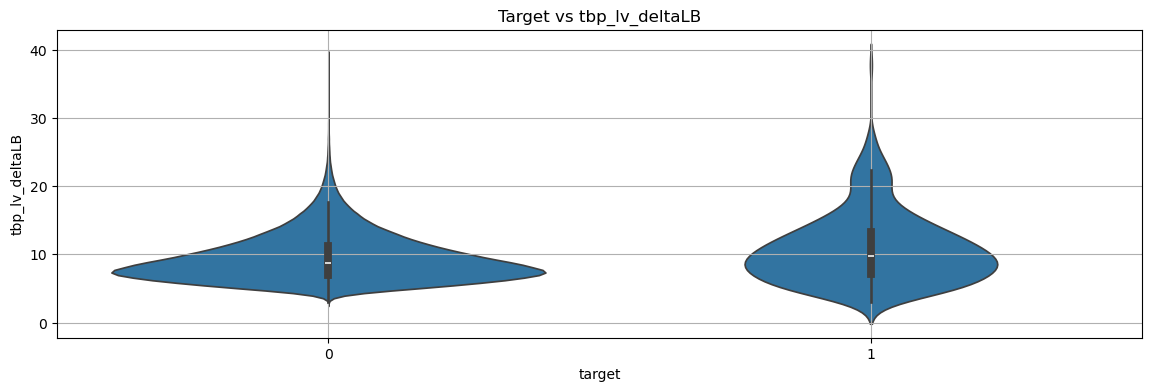

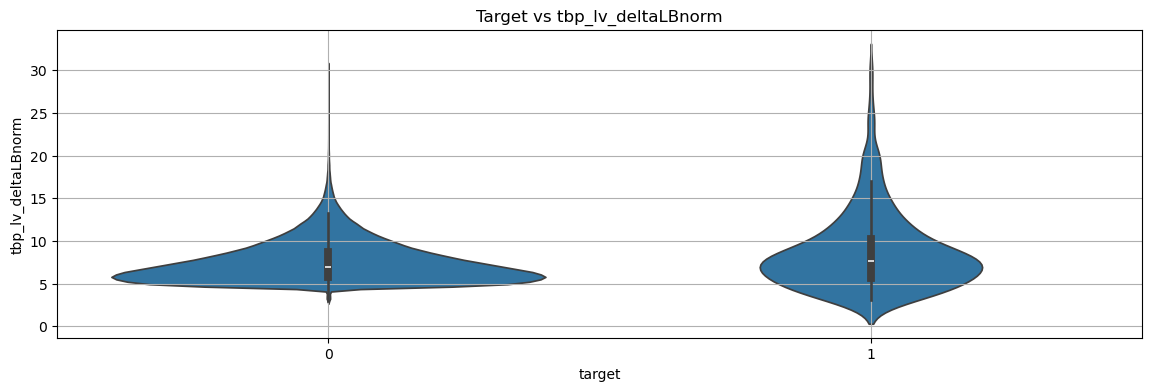

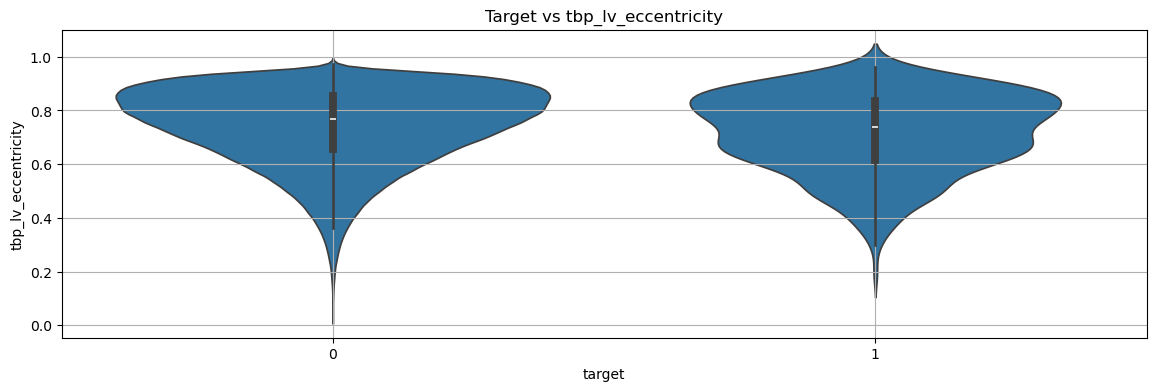

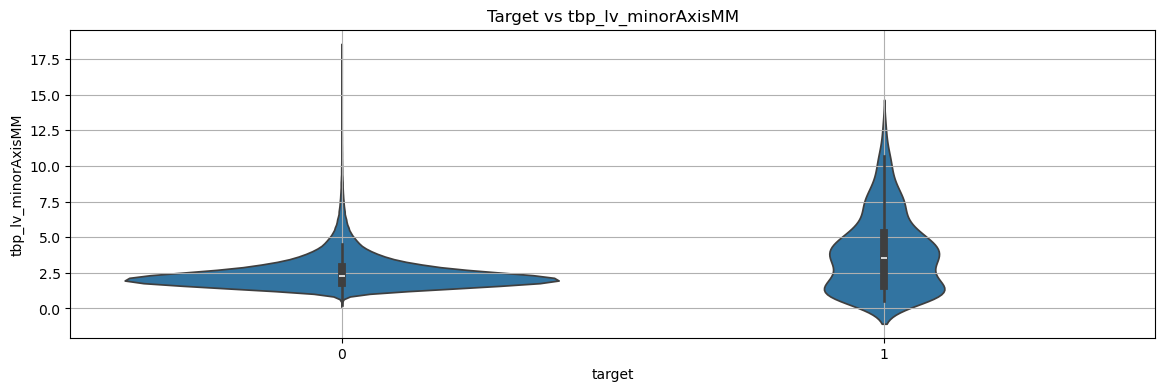

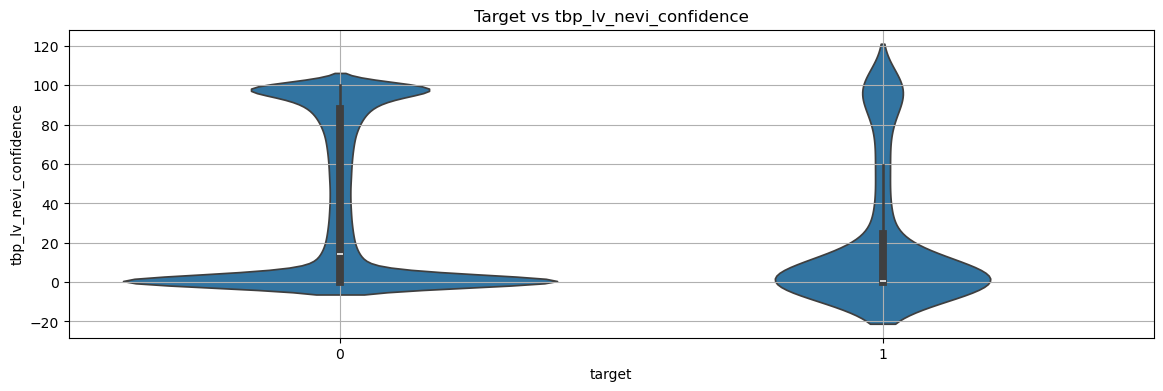

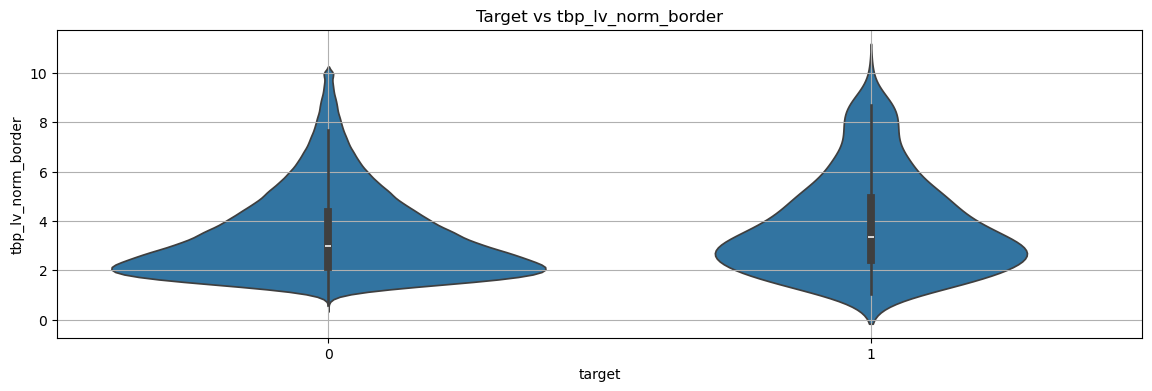

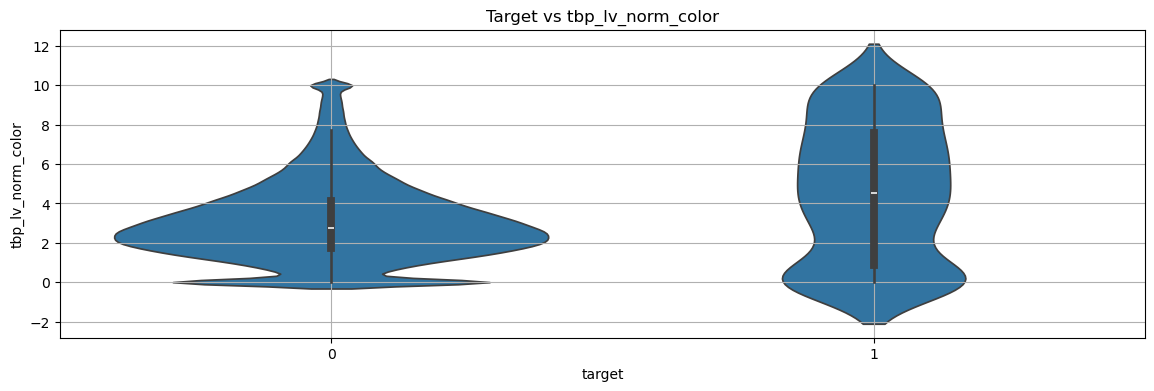

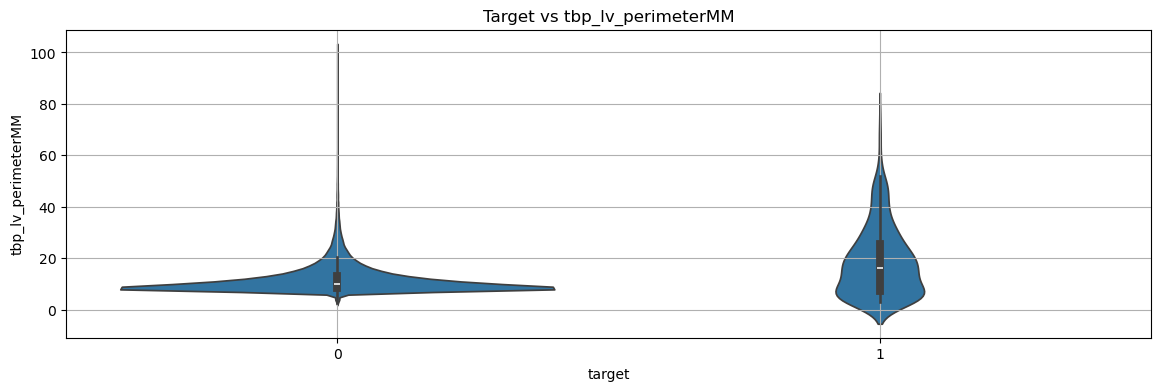

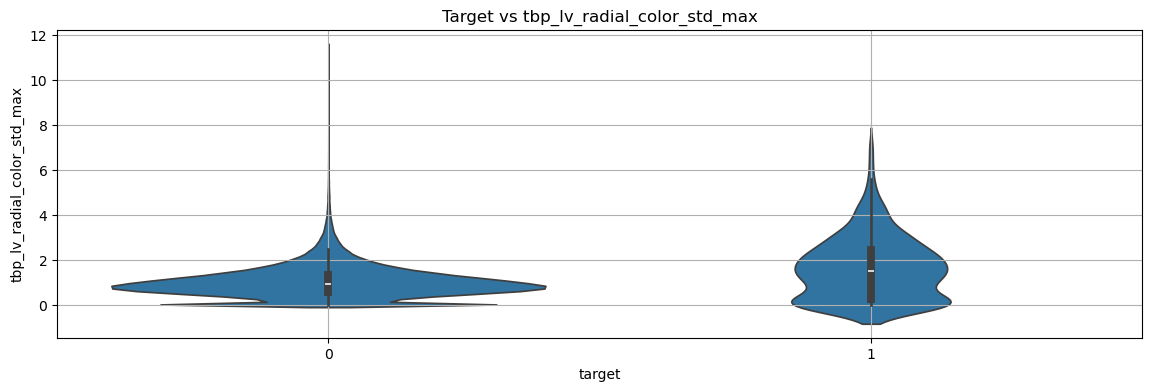

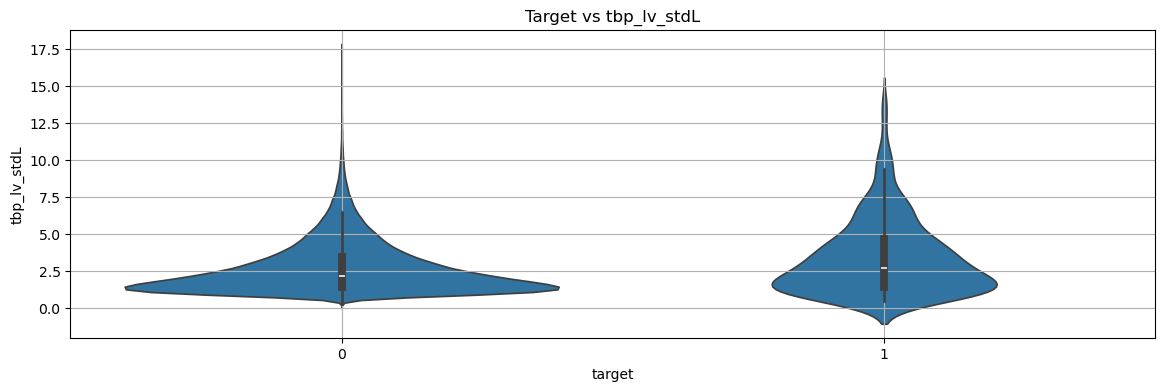

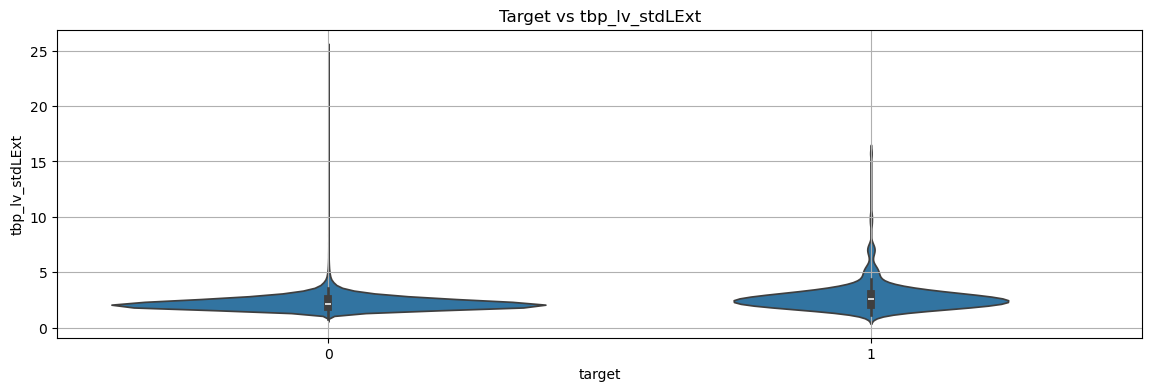

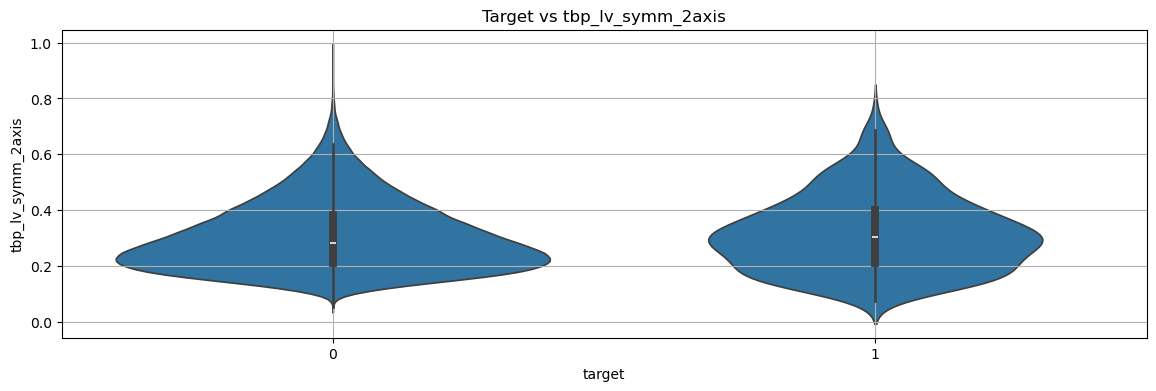

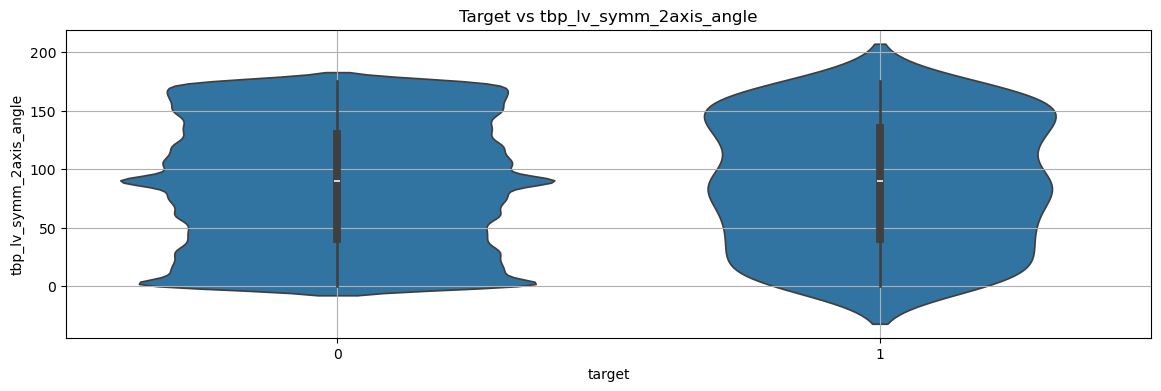

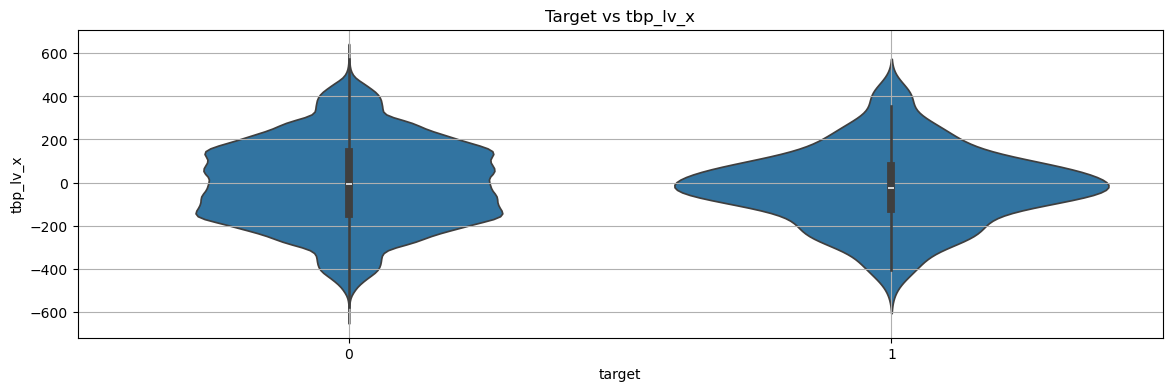

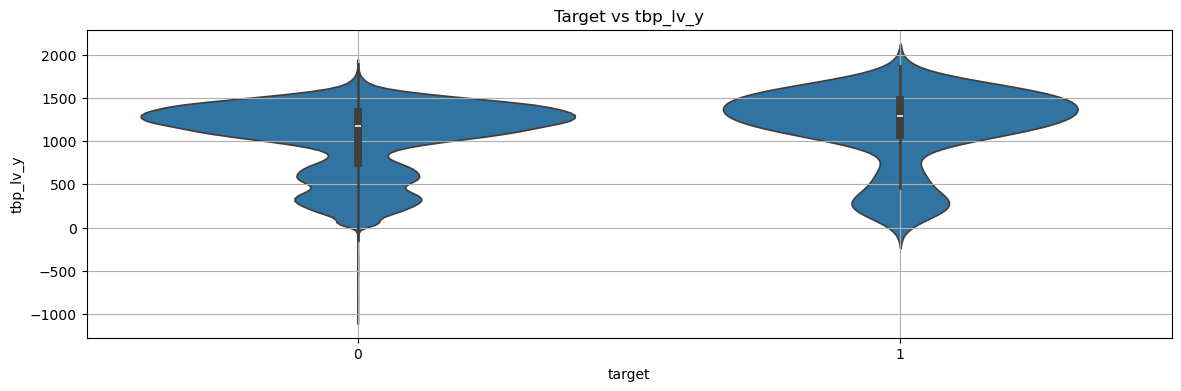

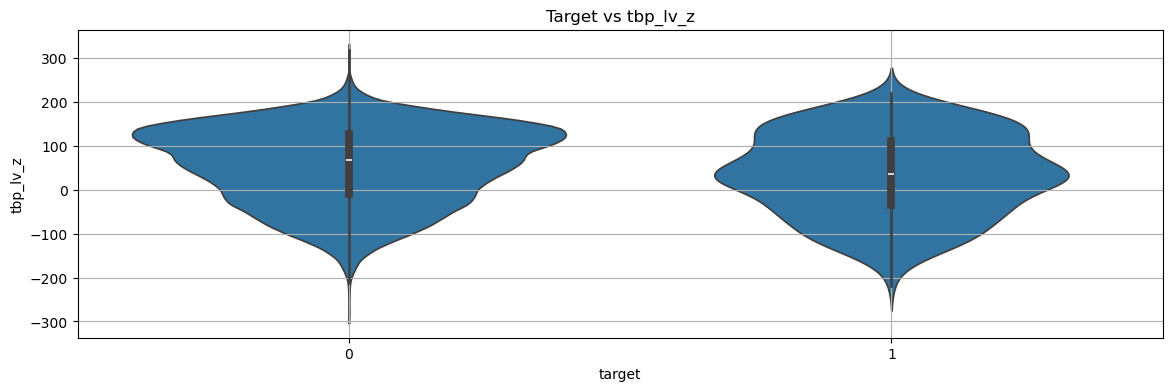

In [12]:
# target vs numerical features
for f in features_num:
    my_title = 'Target vs ' + f
    plt.figure(figsize=(14,4))
    sns.violinplot(data=df_train, x=target, y=f)
    plt.title(my_title)
    plt.grid()
    plt.show()

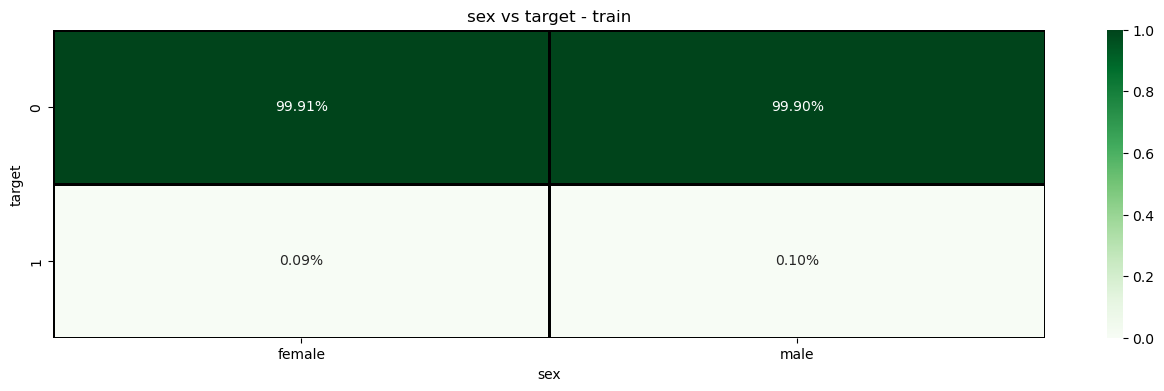

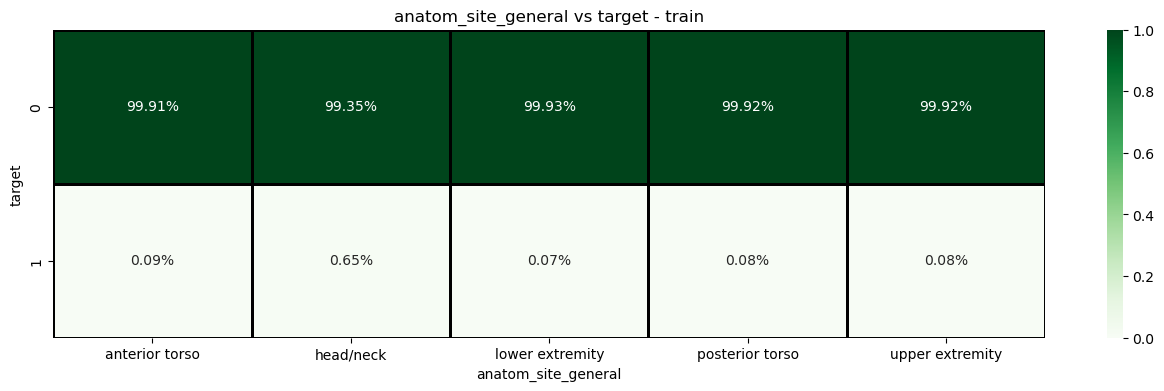

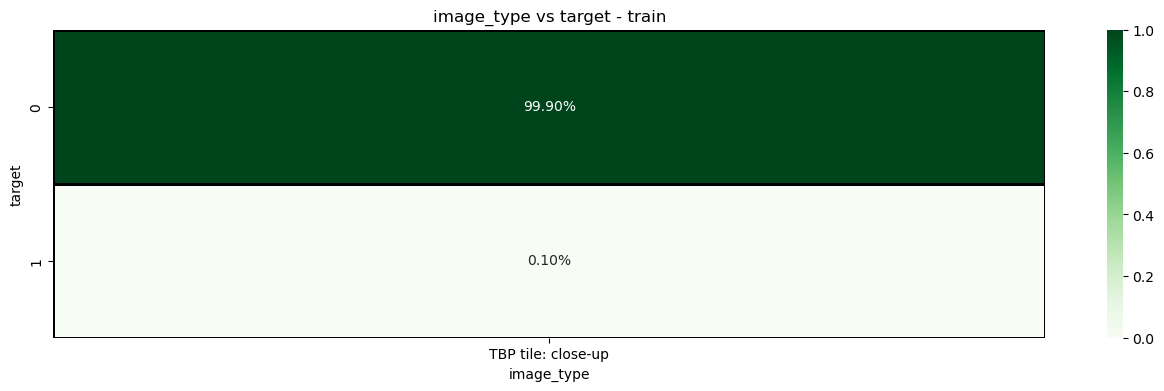

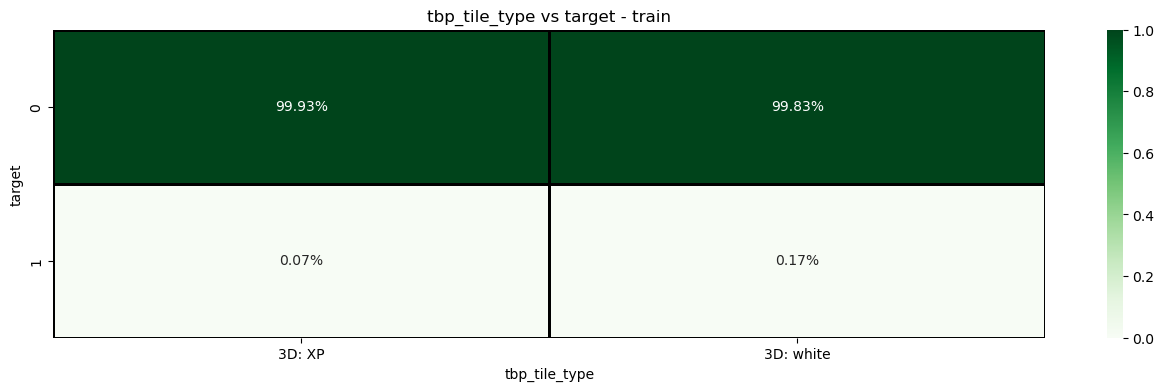

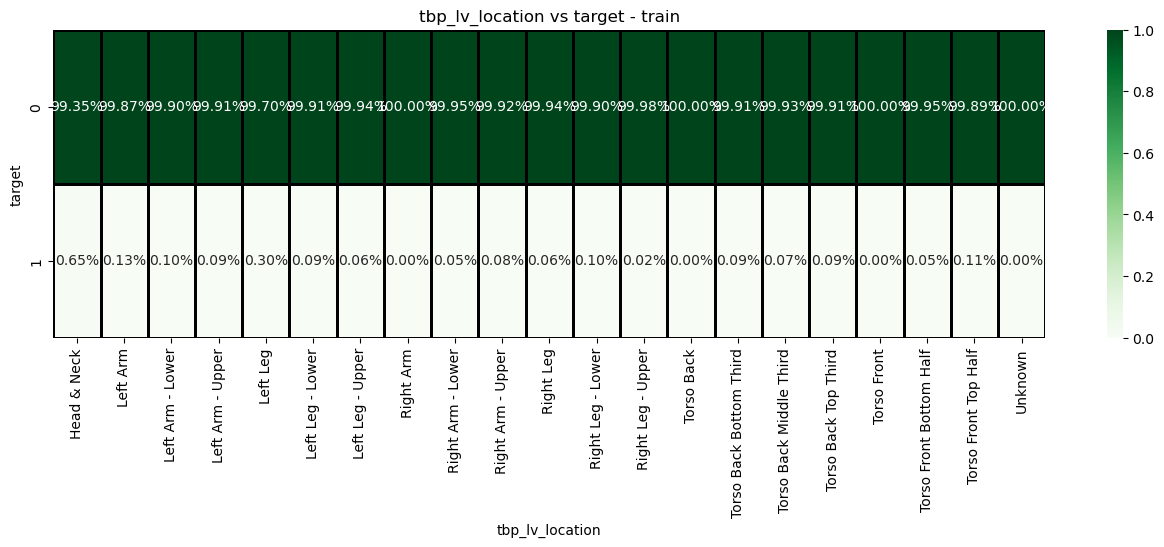

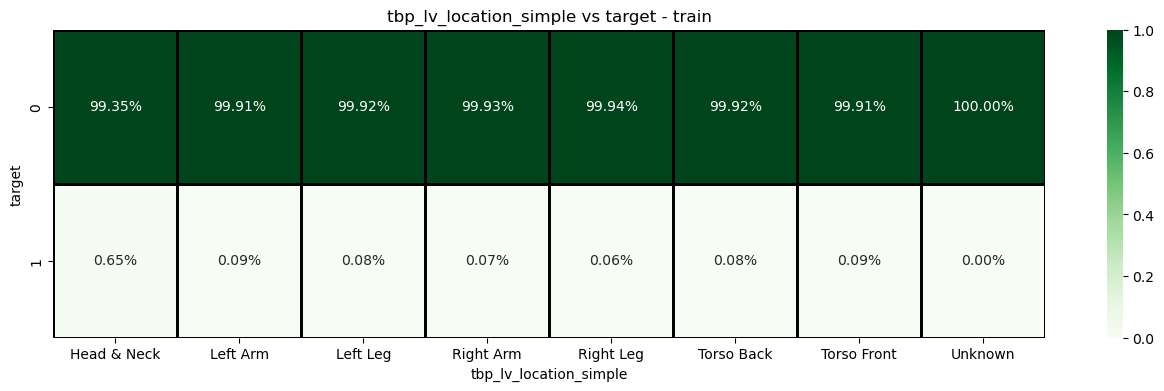

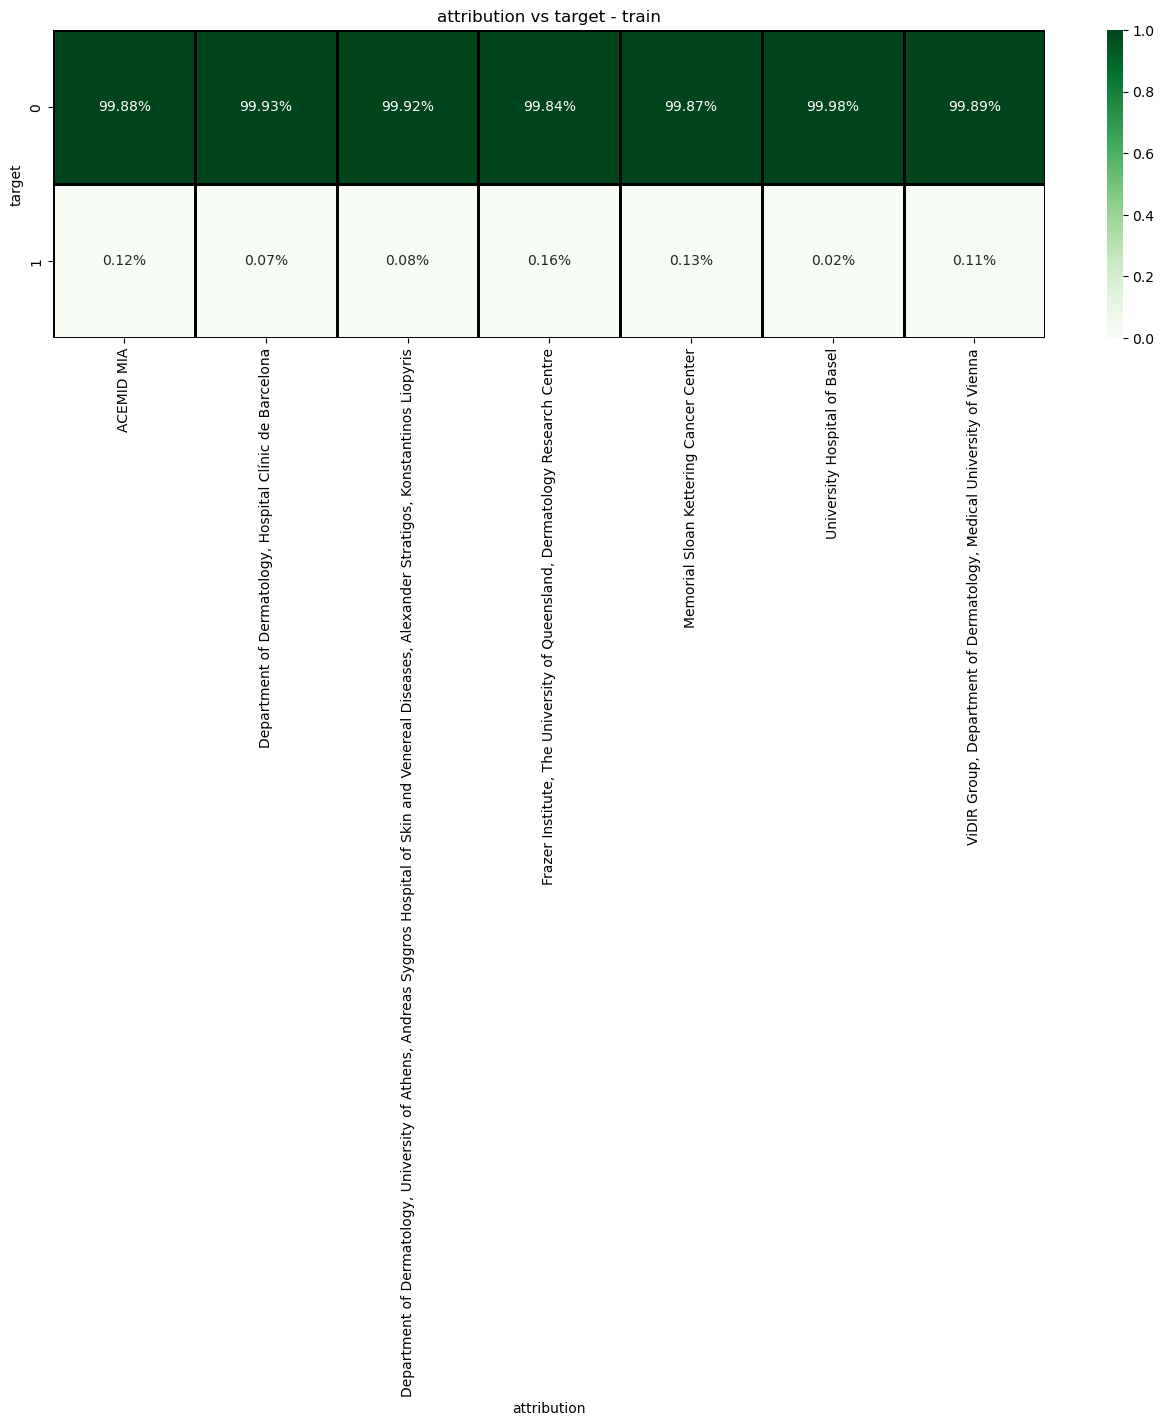

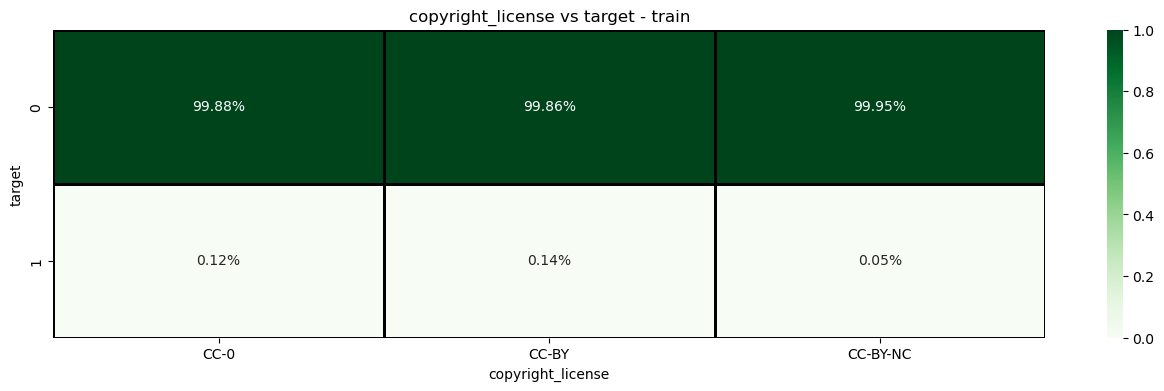

In [13]:
# impact of categorical features - normalized cross tables
for f in features_cat:
        ctab = pd.crosstab(df_train[target], df_train[f])
        ctab_norm = ctab / ctab.sum()
        plt.figure(figsize=(16,4))
        g = sns.heatmap(ctab_norm, annot=True,
                        fmt='.2%', linecolor='black',
                        linewidths=1, cmap='Greens', 
                        vmin=0, vmax=+1)
        plt.title(f + ' vs target - train')
        plt.show()